# Time Series

## Data preparation & Exploration

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [36]:
# load dataset
df = pd.read_csv('exchange_rate.csv')
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [37]:
# structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [38]:
# summary
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


In [39]:
# changing to Date
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')

In [40]:
# making date as Index
df.set_index('date', inplace=True)

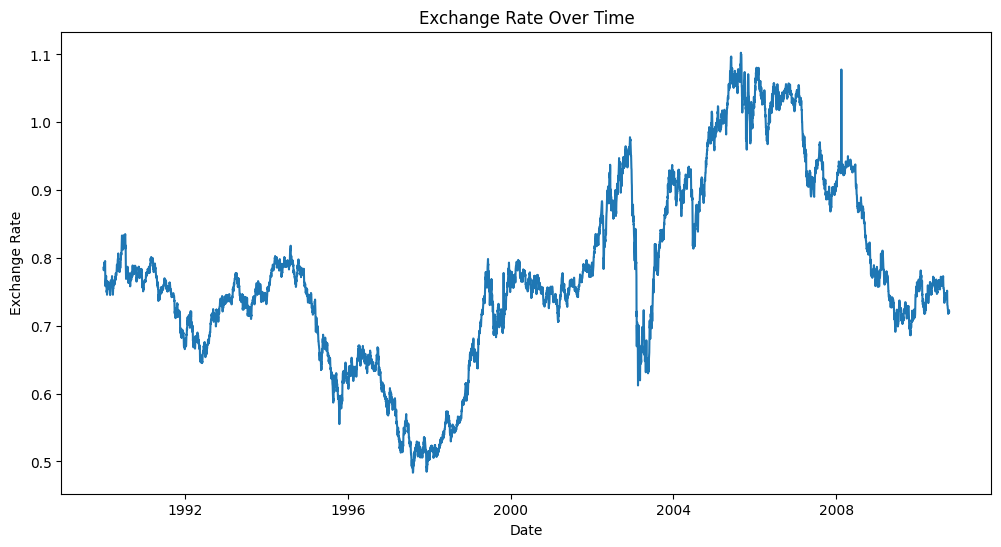

In [41]:
# line plot to observe trend
plt.figure(figsize=(12, 6))
plt.plot(df['Ex_rate'])
plt.title('Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.show()

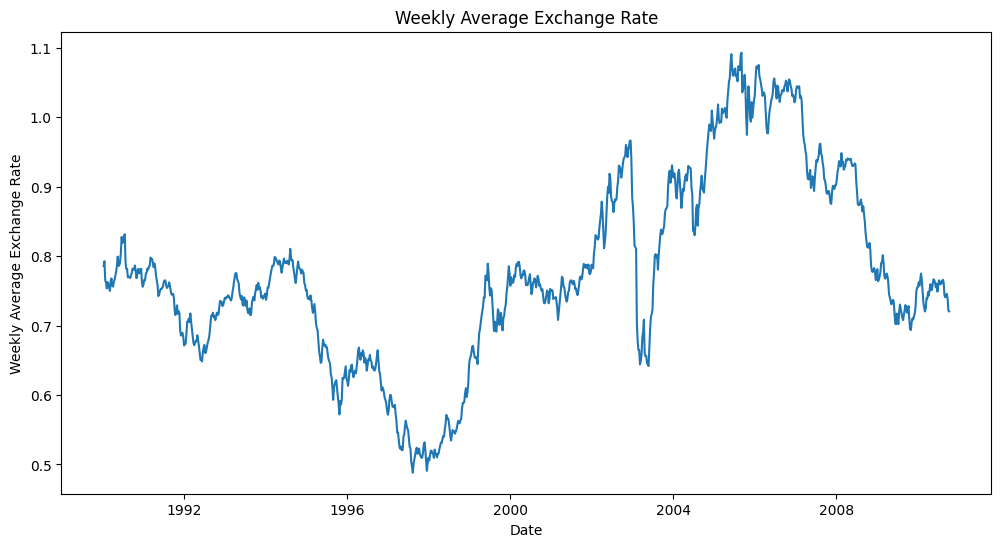

In [42]:
# resampling to weekly
weekly_df = df.resample('W').mean()

plt.figure(figsize=(12, 6))
plt.plot(weekly_df['Ex_rate'])
plt.title('Weekly Average Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Weekly Average Exchange Rate')
plt.show()

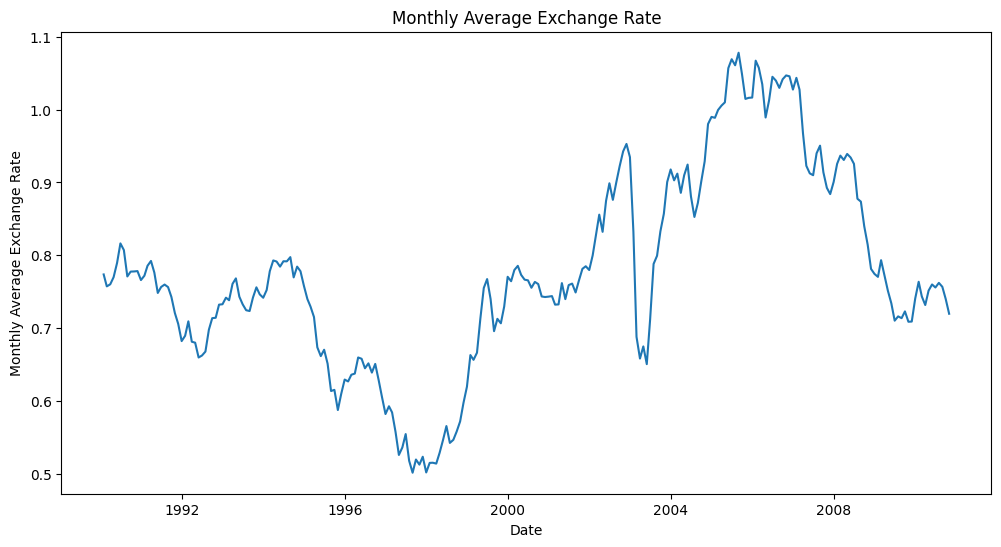

In [43]:
# resample
monthly_df = df.resample('M').mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_df['Ex_rate'])
plt.title('Monthly Average Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Monthly Average Exchange Rate')
plt.show()

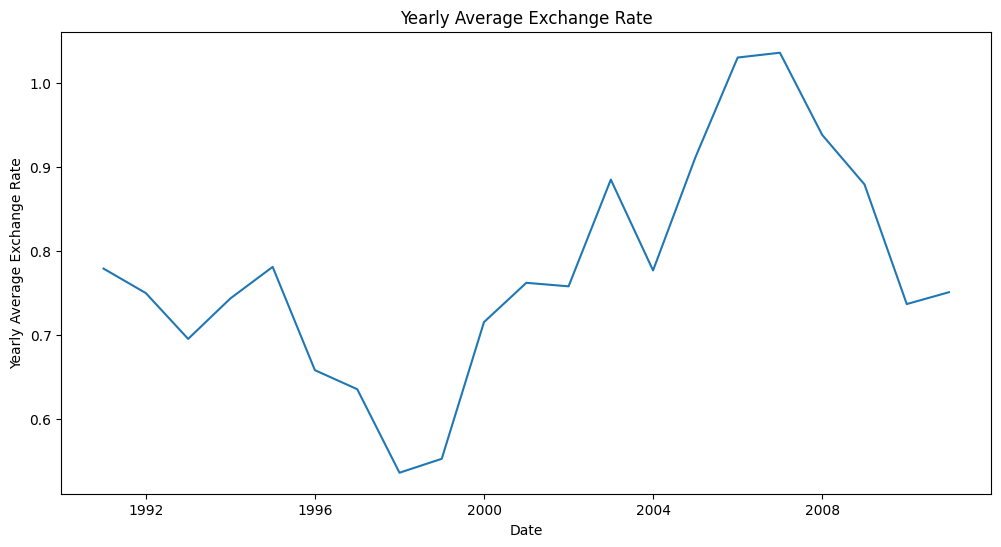

In [44]:
# yearly
yearly_df = df.resample('Y').mean()

plt.figure(figsize=(12, 6))
plt.plot(yearly_df['Ex_rate'])
plt.title('Yearly Average Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Yearly Average Exchange Rate')
plt.show()

Based on above, It is better to work with weekly resampled data, As It is has less observations to work with, and haven't nullified most of the perks.

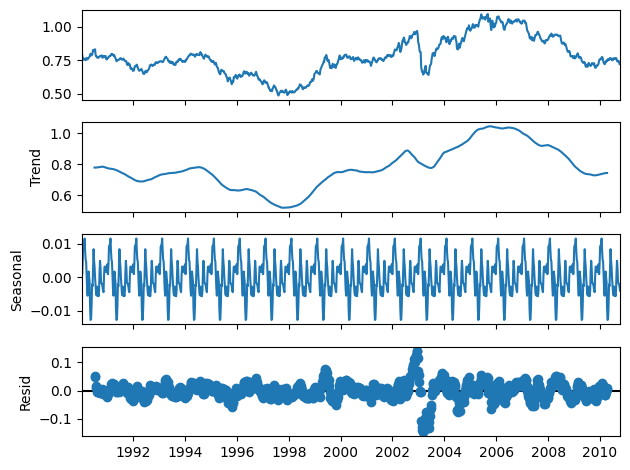

In [45]:
# Decompose time series for Ex_rate
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(weekly_df, model='additive', period=52)
result.plot()
plt.show()

## Model Building Arima

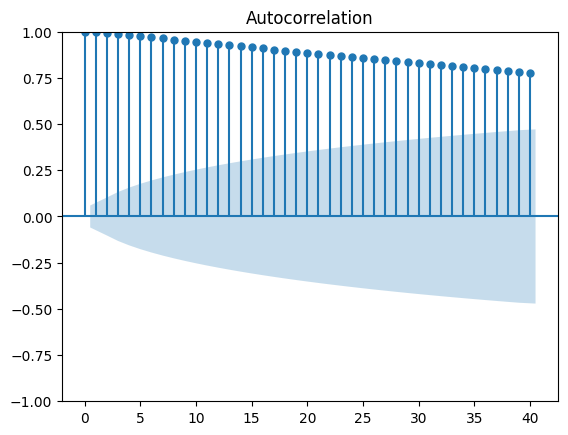

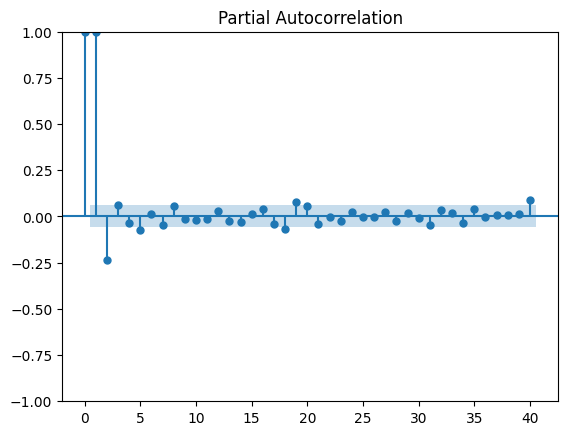

In [46]:
# acf & pacf plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(weekly_df['Ex_rate'], lags=40)
plot_pacf(weekly_df['Ex_rate'], lags=40)
plt.show()

In [47]:
# adf check
from statsmodels.tsa.stattools import adfuller
result = adfuller(weekly_df['Ex_rate'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.800054
p-value: 0.380435


In [48]:
# Transfroming
weekly_df = weekly_df.diff().dropna()

In [49]:
# adf check
from statsmodels.tsa.stattools import adfuller
result = adfuller(weekly_df['Ex_rate'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -14.342092
p-value: 0.000000


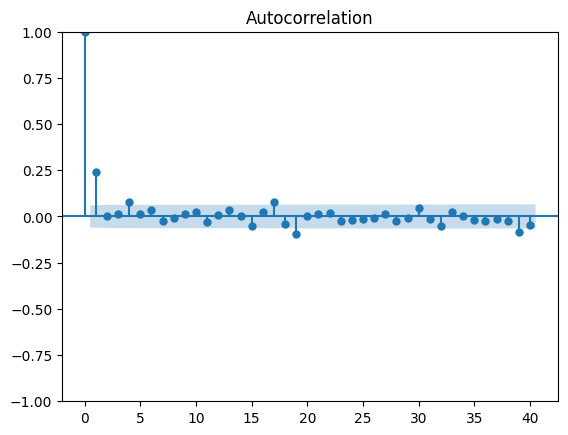

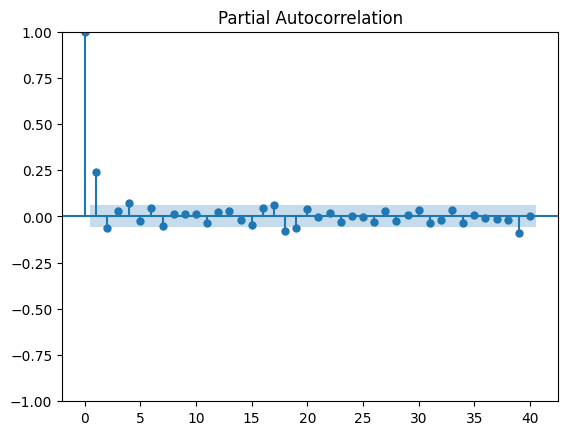

In [50]:
# Auto correlation graph for stationary data
plot_acf(weekly_df['Ex_rate'], lags=40)
plot_pacf(weekly_df['Ex_rate'], lags=40)
plt.show()

In [51]:
# Seasonal Arima model for p=2, d=1, q=2
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(weekly_df['Ex_rate'], order=(2,1,2), seasonal_order=(1,1,1,52))
model_fit = model.fit()

In [52]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                              Ex_rate   No. Observations:                 1083
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 52)   Log Likelihood                3108.125
Date:                              Thu, 26 Dec 2024   AIC                          -6202.250
Time:                                      13:46:19   BIC                          -6167.689
Sample:                                  01-14-1990   HQIC                         -6189.134
                                       - 10-10-2010                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7120      0.075     -9.517      0.000      -0.859      -0.565
ar.L2          0.2442      0.026      9.317      0.000       0.193       0.296
ma.L1         -0.0442      0.080     -0.550      0.583      -0.202       0.113
ma.L2         -0.9550      0.078    -12.268      0.000      -1.108      -0.802
ar.S.L52      -0.0659      0.033     -1.969      0.049      -0.132      -0.000
ma.S.L52      -0.9961      0.605     -1.647      0.100      -2.182       0.190
sigma2         0.0001   6.97e-05      1.702      0.089    -1.8e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              3304.95
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               2.03   Skew:                            -0.94
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

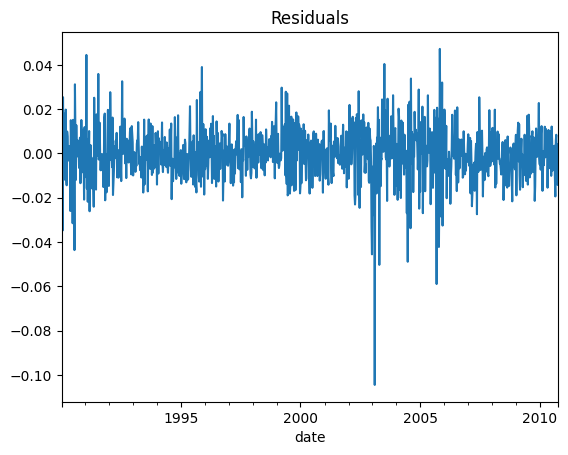

In [53]:
# plot residuals
residuals = model_fit.resid
ax = residuals.plot()
ax.set_title('Residuals')
plt.show()

In [54]:
# predict values
predicted = model_fit.predict(start=1, end=len(weekly_df))
# RMSE
from sklearn.metrics import mean_squared_error, r2_score

# Calculate RMSE using the actual values and the forecast
rmse = np.sqrt(mean_squared_error(weekly_df, predicted))
print(f'Test RMSE: {rmse}')

Test RMSE: 0.009246946793113397


Text(0.5, 1.0, 'Exchange Rate Forecast')

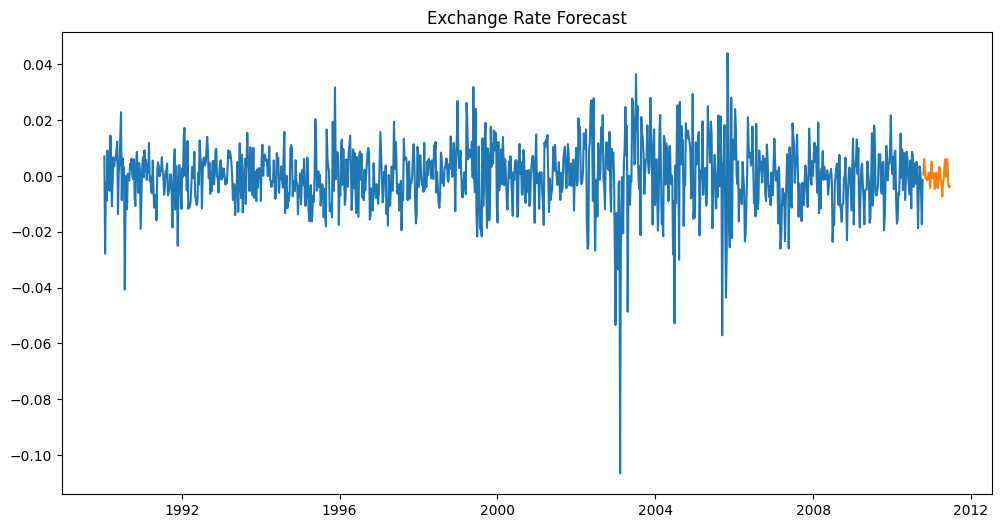

In [62]:
# Forecasting
forecast = model_fit.get_forecast(steps=36)
forecast_df = forecast.predicted_mean

#plot
plt.figure(figsize=(12, 6))
plt.plot(weekly_df['Ex_rate'], label='Actual')
plt.plot(forecast_df, label='Forecast')
plt.title('Exchange Rate Forecast')

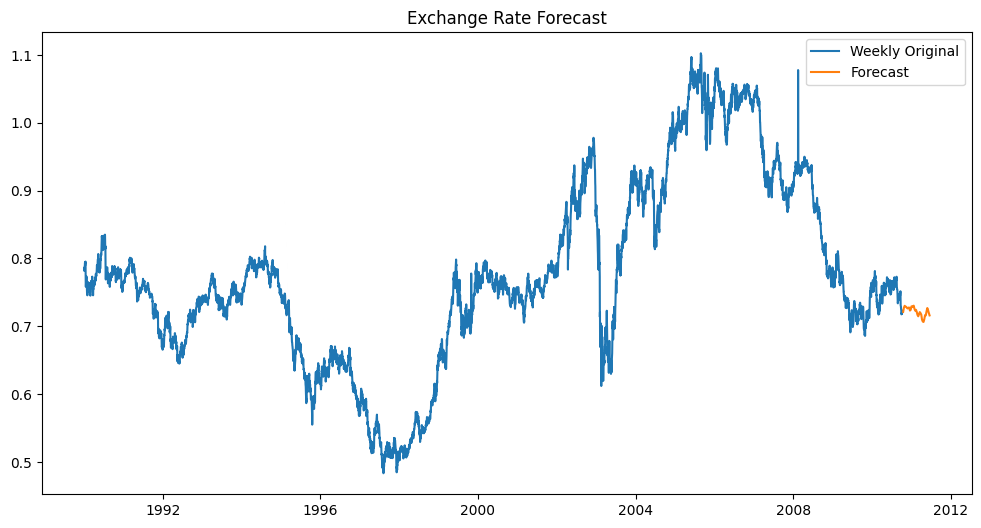

In [64]:
# convert back from transformation applied
weekly_df_original = weekly_df.cumsum()
last_original_value = df['Ex_rate'][-1]
forecast_df_original = forecast_df.cumsum() + last_original_value

plt.figure(figsize=(12, 6))
plt.plot(df['Ex_rate'], label='Weekly Original') # Plot the original data for reference
plt.plot(forecast_df_original, label='Forecast')
plt.title('Exchange Rate Forecast')
plt.legend()
plt.show()

## Model Building - Exponential Smoothing

Holt-Winters RMSE: 0.010964744239335873


Text(0.5, 1.0, 'Exchange Rate Forecast')

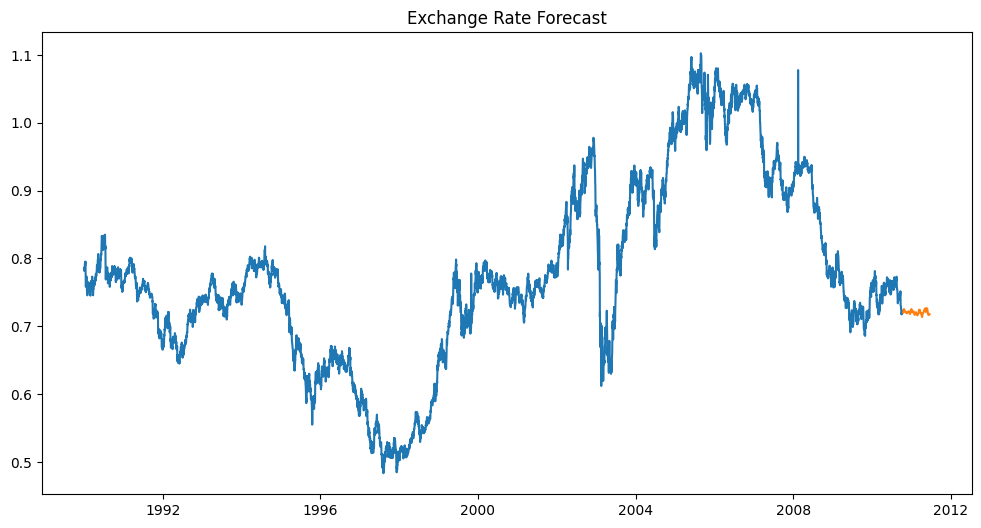

In [79]:
# build model
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model_hw = ExponentialSmoothing(weekly_df['Ex_rate'], trend='add', seasonal='add', seasonal_periods=52)
model_fit_hw = model_hw.fit()

#predict
predicted_hw = model_fit_hw.predict(start=0, end=len(weekly_df)-1)

#rmse
rmse_hw = np.sqrt(mean_squared_error(weekly_df['Ex_rate'], predicted_hw))
print(f'Holt-Winters RMSE: {rmse_hw}')

# forecast
forecast_hw = model_fit_hw.forecast(steps=36)

# Instead of cumsum, use the original weekly_df index for the forecast
forecast_df_original_hw = pd.Series(forecast_hw, index=pd.date_range(start=weekly_df.index[-1] + pd.Timedelta(days=7), periods=36, freq='W'))

forecast_df_original_hw = forecast_df_original_hw + df['Ex_rate'][-1]

plt.figure(figsize=(12, 6))
plt.plot(df['Ex_rate'], label='Original')
plt.plot(forecast_df_original_hw, label='Holt-Winters Forecast')
plt.title('Exchange Rate Forecast')

## Evaluation & Comparison



*   Clearly, Seasonal ARIMA has less RMSE value compared to exponential Smoothing, and the forecast which seasonal ARIMA is providing is somewhat convincible compared to Holt's Winter i.e., Triple Exponential Smoothing model.
*   But major limitations in seasonal ARIMA is they are dealing with more parameters compared to Holt's winter. Time taken by SARIMA in this problem is much greater than Holt's winter model.

